In [1]:
# Importing necessary libraries for data manipulation, analysis, and machine learning

import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading the serialized DataFrame from the 'odi_data_extract.pkl' file
dataframe_3 = pickle.load(open('odi_data_extract.pkl', 'rb'))

In [3]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...,...,...
699581,2420,Ireland,Afghanistan,Afghanistan,field,49.2,4,0,Belfast,"Civil Service Cricket Club, Stormont"
699582,2420,Ireland,Afghanistan,Afghanistan,field,49.3,4,0,Belfast,"Civil Service Cricket Club, Stormont"
699583,2420,Ireland,Afghanistan,Afghanistan,field,49.4,1,0,Belfast,"Civil Service Cricket Club, Stormont"
699584,2420,Ireland,Afghanistan,Afghanistan,field,49.5,1,0,Belfast,"Civil Service Cricket Club, Stormont"


In [4]:
# Displaying information about the DataFrame
dataframe_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618005 entries, 0 to 699585
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   match_id                   618005 non-null  int64  
 1   batting_team               618005 non-null  object 
 2   bowling_team               618005 non-null  object 
 3   toss_winner                618005 non-null  object 
 4   toss_decision_from_winner  618005 non-null  object 
 5   ball                       618005 non-null  float64
 6   runs                       618005 non-null  int64  
 7   player_dismissed           618005 non-null  object 
 8   city                       530836 non-null  object 
 9   venue                      618005 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 51.9+ MB


In [5]:
# Checking for missing values in each column and display the sum of missing values
dataframe_3.isnull().sum()

match_id                         0
batting_team                     0
bowling_team                     0
toss_winner                      0
toss_decision_from_winner        0
ball                             0
runs                             0
player_dismissed                 0
city                         87169
venue                            0
dtype: int64

In [6]:
# Identifying venues where 'city' information is missing and count occurrences for each venue
dataframe_3[dataframe_3['city'].isnull()]['venue'].value_counts()

venue
Harare Sports Club                         19714
Sydney Cricket Ground                      10525
Rangiri Dambulla International Stadium     10051
Melbourne Cricket Ground                    8696
Sharjah Cricket Stadium                     8607
Adelaide Oval                               8035
Dubai International Cricket Stadium         6938
Pallekele International Cricket Stadium     6721
Rawalpindi Cricket Stadium                  1513
Multan Cricket Stadium                      1509
Queenstown Events Centre                     909
Chittagong Divisional Stadium                900
Mombasa Sports Club Ground                   595
Perth Stadium                                526
Dubai Sports City Cricket Stadium            518
Galle International Stadium                  513
Bulawayo Athletic Club                       305
Sharjah Cricket Association Stadium          303
Sheikhupura Stadium                          291
Name: count, dtype: int64

In [7]:
# Using np.where to fill missing 'city' values with the first word from 'venue' column
cities = np.where(dataframe_3['city'].isnull(),dataframe_3['venue'].str.split().apply(lambda x:x[0]),dataframe_3['city'])

In [8]:
# Assigning the values from the 'cities' array to the 'city' column in dataframe_3
dataframe_3['city'] = cities

In [9]:
# Checking for missing values in each column and display the sum of missing values
dataframe_3.isnull().sum()

match_id                     0
batting_team                 0
bowling_team                 0
toss_winner                  0
toss_decision_from_winner    0
ball                         0
runs                         0
player_dismissed             0
city                         0
venue                        0
dtype: int64

In [10]:
# Converting 'runs' column to numeric, replacing non-numeric values with NaN
dataframe_3['runs'] = pd.to_numeric(dataframe_3['runs'], errors='coerce')

# Creating a new column 'current_score' with the cumulative sum of 'runs' for each match
dataframe_3['current_score'] = dataframe_3.groupby('match_id')['runs'].cumsum()

In [11]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1
...,...,...,...,...,...,...,...,...,...,...,...
699581,2420,Ireland,Afghanistan,Afghanistan,field,49.2,4,0,Belfast,"Civil Service Cricket Club, Stormont",259
699582,2420,Ireland,Afghanistan,Afghanistan,field,49.3,4,0,Belfast,"Civil Service Cricket Club, Stormont",263
699583,2420,Ireland,Afghanistan,Afghanistan,field,49.4,1,0,Belfast,"Civil Service Cricket Club, Stormont",264
699584,2420,Ireland,Afghanistan,Afghanistan,field,49.5,1,0,Belfast,"Civil Service Cricket Club, Stormont",265


In [12]:
# Creating a new column 'over' with the over number
dataframe_3['over'] = dataframe_3['ball'].apply(lambda x: str(x).split(".")[0])

# Creating a new column 'ball_number' with the ball number within the over
dataframe_3['ball_number'] = dataframe_3['ball'].apply(lambda x: str(x).split(".")[1])

In [13]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score,over,ball_number
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699581,2420,Ireland,Afghanistan,Afghanistan,field,49.2,4,0,Belfast,"Civil Service Cricket Club, Stormont",259,49,2
699582,2420,Ireland,Afghanistan,Afghanistan,field,49.3,4,0,Belfast,"Civil Service Cricket Club, Stormont",263,49,3
699583,2420,Ireland,Afghanistan,Afghanistan,field,49.4,1,0,Belfast,"Civil Service Cricket Club, Stormont",264,49,4
699584,2420,Ireland,Afghanistan,Afghanistan,field,49.5,1,0,Belfast,"Civil Service Cricket Club, Stormont",265,49,5


In [14]:
# Creating a new column 'balls_bowled' representing the total number of balls bowled in a match
dataframe_3['balls_bowled'] = (dataframe_3['over'].astype('int') * 6) + dataframe_3['ball_number'].astype('int')

In [15]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score,over,ball_number,balls_bowled
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1,1
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2,2
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3,3
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4,4
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699581,2420,Ireland,Afghanistan,Afghanistan,field,49.2,4,0,Belfast,"Civil Service Cricket Club, Stormont",259,49,2,296
699582,2420,Ireland,Afghanistan,Afghanistan,field,49.3,4,0,Belfast,"Civil Service Cricket Club, Stormont",263,49,3,297
699583,2420,Ireland,Afghanistan,Afghanistan,field,49.4,1,0,Belfast,"Civil Service Cricket Club, Stormont",264,49,4,298
699584,2420,Ireland,Afghanistan,Afghanistan,field,49.5,1,0,Belfast,"Civil Service Cricket Club, Stormont",265,49,5,299


In [16]:
# Creating a new column 'balls_left' representing the number of balls left in an ODI match
dataframe_3['balls_left'] = 300 - dataframe_3['balls_bowled']

# Replacing any negative values with 0
dataframe_3['balls_left'] = dataframe_3['balls_left'].apply(lambda x: 0 if x < 0 else x)

In [17]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score,over,ball_number,balls_bowled,balls_left
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1,1,299
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2,2,298
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3,3,297
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4,4,296
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5,5,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699581,2420,Ireland,Afghanistan,Afghanistan,field,49.2,4,0,Belfast,"Civil Service Cricket Club, Stormont",259,49,2,296,4
699582,2420,Ireland,Afghanistan,Afghanistan,field,49.3,4,0,Belfast,"Civil Service Cricket Club, Stormont",263,49,3,297,3
699583,2420,Ireland,Afghanistan,Afghanistan,field,49.4,1,0,Belfast,"Civil Service Cricket Club, Stormont",264,49,4,298,2
699584,2420,Ireland,Afghanistan,Afghanistan,field,49.5,1,0,Belfast,"Civil Service Cricket Club, Stormont",265,49,5,299,1


In [18]:
# Converting 'player_dismissed' column to numeric values, filling NaN with 0, and convert to integers
dataframe_3['player_dismissed'] = pd.to_numeric(dataframe_3['player_dismissed'], errors='coerce').fillna(0).astype(int)

# Calculating the cumulative sum of dismissals ('player_dismissed') for each match
dataframe_3['player_dismissed'] = dataframe_3.groupby('match_id')['player_dismissed'].cumsum()

# Creating a new column 'wickets_left' representing the number of wickets remaining in each match
dataframe_3['wickets_left'] = 10 - dataframe_3['player_dismissed']

In [19]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score,over,ball_number,balls_bowled,balls_left,wickets_left
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1,1,299,10
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2,2,298,10
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3,3,297,10
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4,4,296,10
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5,5,295,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699581,2420,Ireland,Afghanistan,Afghanistan,field,49.2,4,0,Belfast,"Civil Service Cricket Club, Stormont",259,49,2,296,4,10
699582,2420,Ireland,Afghanistan,Afghanistan,field,49.3,4,0,Belfast,"Civil Service Cricket Club, Stormont",263,49,3,297,3,10
699583,2420,Ireland,Afghanistan,Afghanistan,field,49.4,1,0,Belfast,"Civil Service Cricket Club, Stormont",264,49,4,298,2,10
699584,2420,Ireland,Afghanistan,Afghanistan,field,49.5,1,0,Belfast,"Civil Service Cricket Club, Stormont",265,49,5,299,1,10


In [20]:
# Calculating the current run rate and create a new column 'current_run_rate'
dataframe_3['current_run_rate'] = (dataframe_3['current_score'] * 6) / dataframe_3['balls_bowled']

In [21]:
# Grouping the DataFrame by 'match_id'
groups = dataframe_3.groupby('match_id')

# Getting unique match_ids
match_ids = dataframe_3['match_id'].unique()

# Initializing an empty list to store the rolling sum of runs for the last 30 balls in each match
last_five = []

# Iterating through each match_id
for match_id in match_ids:
    # Extracting the data for the current match_id
    match_data = groups.get_group(match_id)
    
    # Calculating the rolling sum of runs for the last 30 balls and convert it to a list
    runs_rolling_sum = match_data['runs'].rolling(window=30).sum().values.tolist()
    
    # Extending the 'last_five' list with the rolling sum values
    last_five.extend(runs_rolling_sum)

In [22]:
# Add a new column 'last_five' to the DataFrame and assign values from the 'last_five' list
dataframe_3['last_five'] = last_five

last_five

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 13.0,
 13.0,
 14.0,
 15.0,
 16.0,
 19.0,
 20.0,
 20.0,
 20.0,
 19.0,
 19.0,
 20.0,
 23.0,
 23.0,
 22.0,
 28.0,
 28.0,
 29.0,
 29.0,
 33.0,
 33.0,
 34.0,
 34.0,
 34.0,
 37.0,
 41.0,
 40.0,
 39.0,
 39.0,
 39.0,
 43.0,
 47.0,
 46.0,
 46.0,
 46.0,
 42.0,
 41.0,
 41.0,
 41.0,
 41.0,
 42.0,
 42.0,
 39.0,
 39.0,
 39.0,
 34.0,
 33.0,
 31.0,
 32.0,
 28.0,
 29.0,
 28.0,
 28.0,
 24.0,
 22.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 14.0,
 11.0,
 12.0,
 11.0,
 10.0,
 14.0,
 14.0,
 15.0,
 15.0,
 15.0,
 15.0,
 14.0,
 15.0,
 16.0,
 17.0,
 16.0,
 17.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 19.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,
 18.0,
 19.0,
 19.0,
 20.0,
 21.0,
 22.0,
 19.0,
 19.0,
 18.0,
 19.0,
 19.0,
 20.0,
 20.0,
 19.0,
 22.0,
 21.0,
 22.0,
 23.0,
 22.0,
 21.0,
 22.0,
 21.0,
 22.0,
 21.0,
 24.0,
 24.0,
 25.0,
 24.0,
 25.0,


In [23]:
# Group the DataFrame by 'match_id' and calculate the sum of runs for each match and merging the grouped data back with the original DataFrame based on 'match_id'
dataframe_3 = dataframe_3.groupby('match_id')['runs'].sum().reset_index().merge(dataframe_3, on='match_id')

In [24]:
dataframe_3

,match_id,runs_x,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs_y,player_dismissed,city,venue,current_score,over,ball_number,balls_bowled,balls_left,wickets_left,current_run_rate,last_five
0,1,268,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1,1,299,10,0.000000,NaN
1,1,268,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2,2,298,10,0.000000,NaN
2,1,268,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3,3,297,10,0.000000,NaN
3,1,268,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4,4,296,10,0.000000,NaN
4,1,268,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5,5,295,10,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618000,2420,265,Ireland,Afghanistan,Afghanistan,field,49.2,4,0,Belfast,"Civil Service Cricket Club, Stormont",259,49,2,296,4,10,5.250000,60.0
618001,2420,265,Ireland,Afghanistan,Afghanistan,field,49.3,4,0,Belfast,"Civil Service Cricket Club, Stormont",263,49,3,297,3,10,5.313131,63.0
618002,2420,265,Ireland,Afghanistan,Afghanistan,field,49.4,1,0,Belfast,"Civil Service Cricket Club, Stormont",264,49,4,298,2,10,5.315436,64.0
618003,2420,265,Ireland,Afghanistan,Afghanistan,field,49.5,1,0,Belfast,"Civil Service Cricket Club, Stormont",265,49,5,299,1,10,5.317726,63.0


In [25]:
# Drop rows with missing values from the DataFrame in-place
dataframe_3.dropna(inplace=True)

In [26]:
# Selecting specific columns from the DataFrame dataframe_3 to create a new DataFrame final_dataframe for predicting features
final_dataframe = dataframe_3[['batting_team', 'bowling_team', 'toss_winner', 'toss_decision_from_winner', 'current_score', 'current_run_rate', 'balls_left', 'wickets_left', 'last_five', 'city', 'venue', 'runs_x']]

In [27]:
final_dataframe

,batting_team,bowling_team,toss_winner,toss_decision_from_winner,current_score,current_run_rate,balls_left,wickets_left,last_five,city,venue,runs_x
29,Australia,Pakistan,Australia,bat,13,2.689655,271,10,13.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
30,Australia,Pakistan,Australia,bat,13,2.600000,270,10,13.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
31,Australia,Pakistan,Australia,bat,14,2.709677,269,10,14.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
32,Australia,Pakistan,Australia,bat,15,2.812500,268,10,15.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
33,Australia,Pakistan,Australia,bat,16,2.909091,267,10,16.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
...,...,...,...,...,...,...,...,...,...,...,...,...
618000,Ireland,Afghanistan,Afghanistan,field,259,5.250000,4,10,60.0,Belfast,"Civil Service Cricket Club, Stormont",265
618001,Ireland,Afghanistan,Afghanistan,field,263,5.313131,3,10,63.0,Belfast,"Civil Service Cricket Club, Stormont",265
618002,Ireland,Afghanistan,Afghanistan,field,264,5.315436,2,10,64.0,Belfast,"Civil Service Cricket Club, Stormont",265
618003,Ireland,Afghanistan,Afghanistan,field,265,5.317726,1,10,63.0,Belfast,"Civil Service Cricket Club, Stormont",265


In [28]:
# Checking for missing values in each column of the DataFrame final_dataframe
final_dataframe.isnull().sum()

batting_team                 0
bowling_team                 0
toss_winner                  0
toss_decision_from_winner    0
current_score                0
current_run_rate             0
balls_left                   0
wickets_left                 0
last_five                    0
city                         0
venue                        0
runs_x                       0
dtype: int64

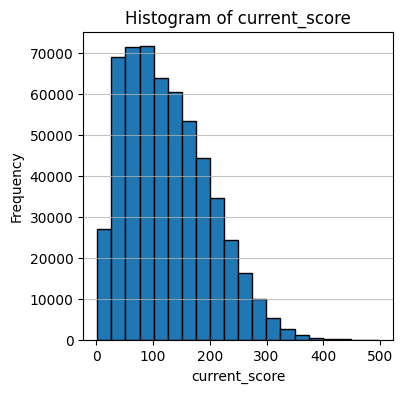

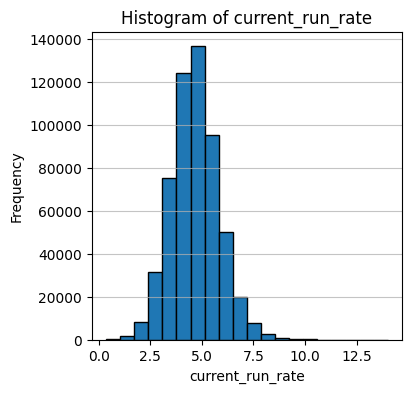

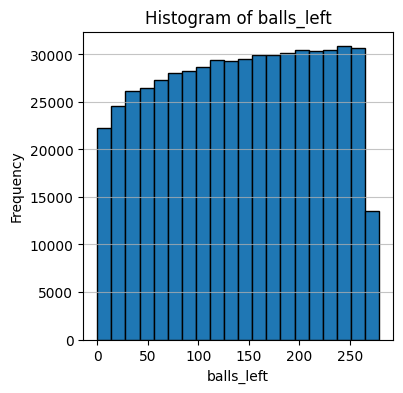

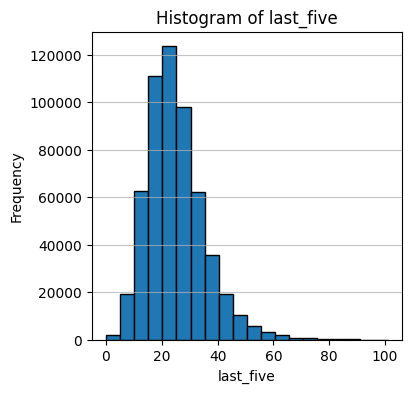

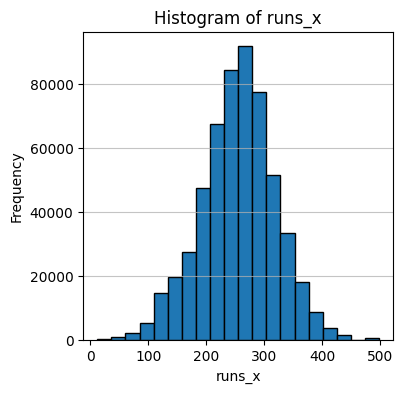

In [29]:
# Numerical columns
numerical_columns = final_dataframe.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(4, 4))
    plt.hist(final_dataframe[col], bins=20, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=.75)
    plt.show()

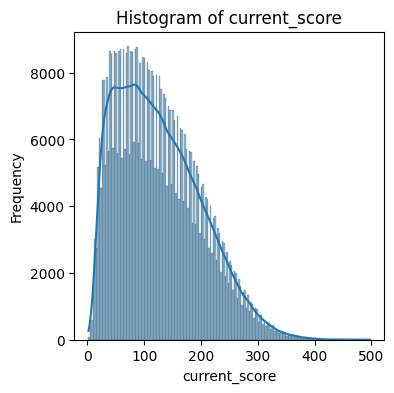

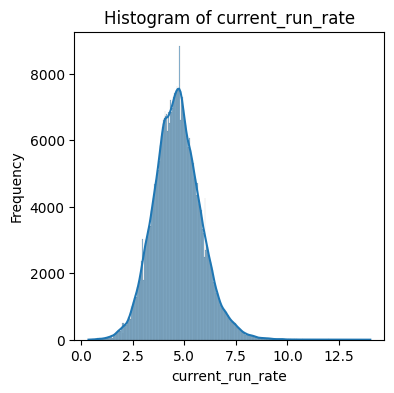

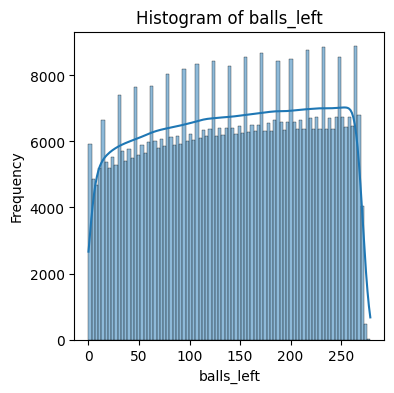

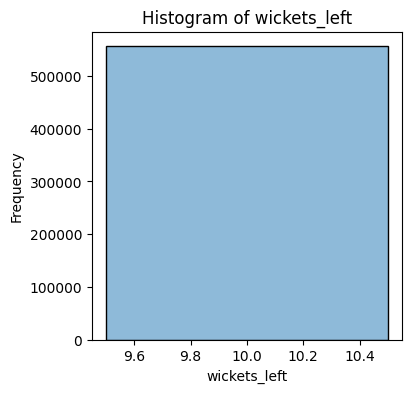

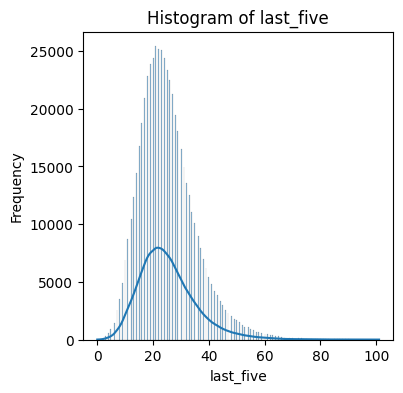

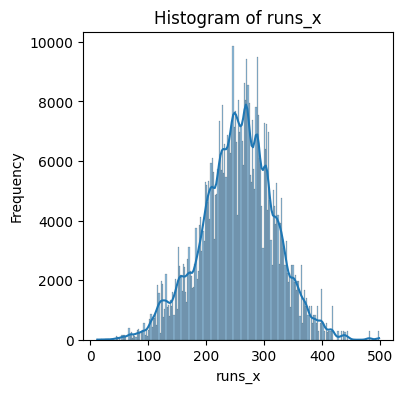

In [30]:
# Creating histograms
columns_to_plot = ['current_score', 'current_run_rate', 'balls_left', 'wickets_left','last_five', 'runs_x']

for column in columns_to_plot:
    plt.figure(figsize=(4, 4))
    sns.histplot(data=final_dataframe, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

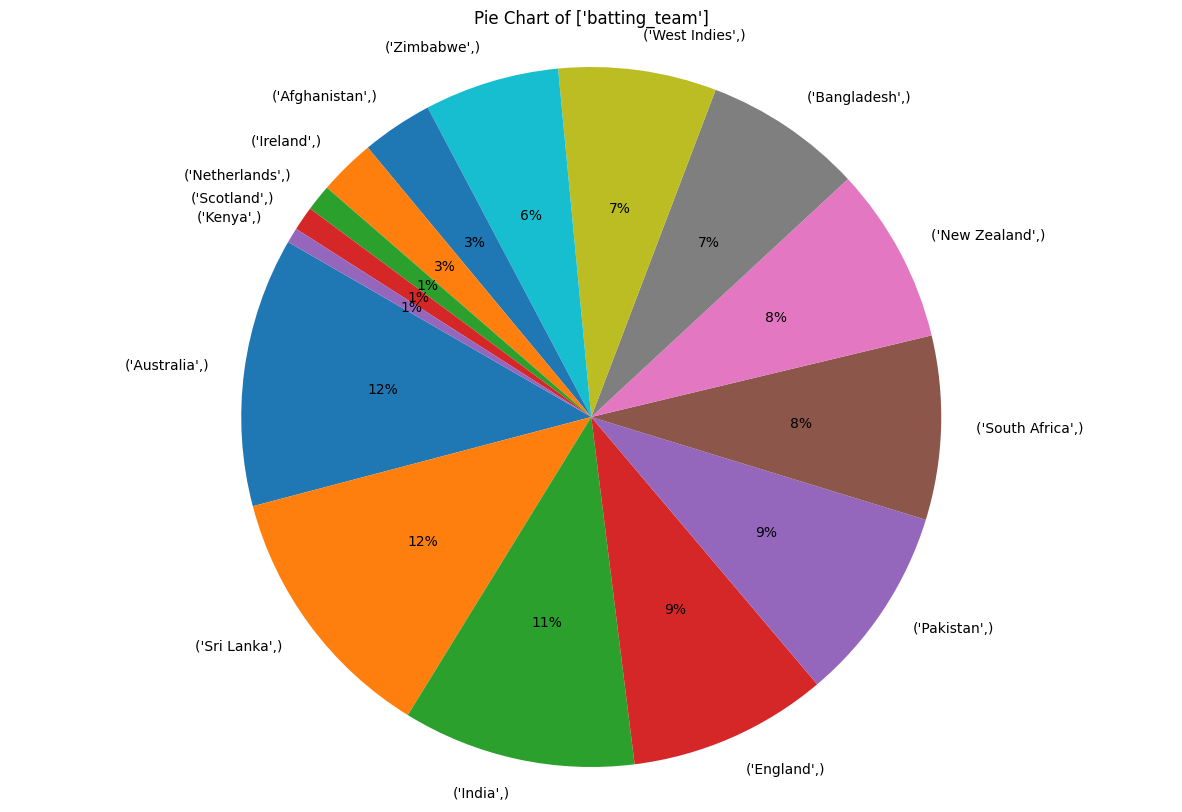

In [31]:
# Plotting pie chart for 'batting_team'
categorical_column = ["batting_team"]


category_counts = final_dataframe[categorical_column].value_counts()


plt.figure(figsize=(15, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=150)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal') 


plt.show()

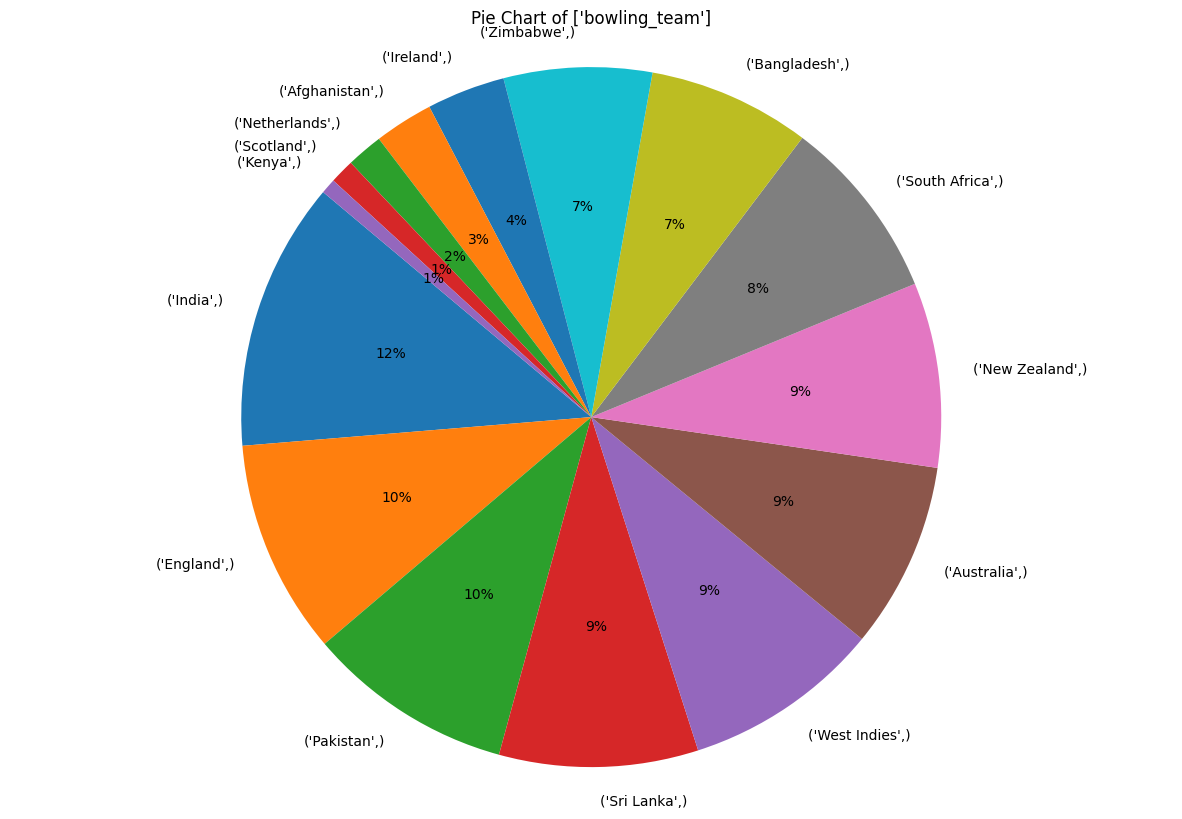

In [32]:
# Plotting pie chart for 'bowling_team'
categorical_column = ["bowling_team"]


category_counts = final_dataframe[categorical_column].value_counts()


plt.figure(figsize=(15, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal')  


plt.show()

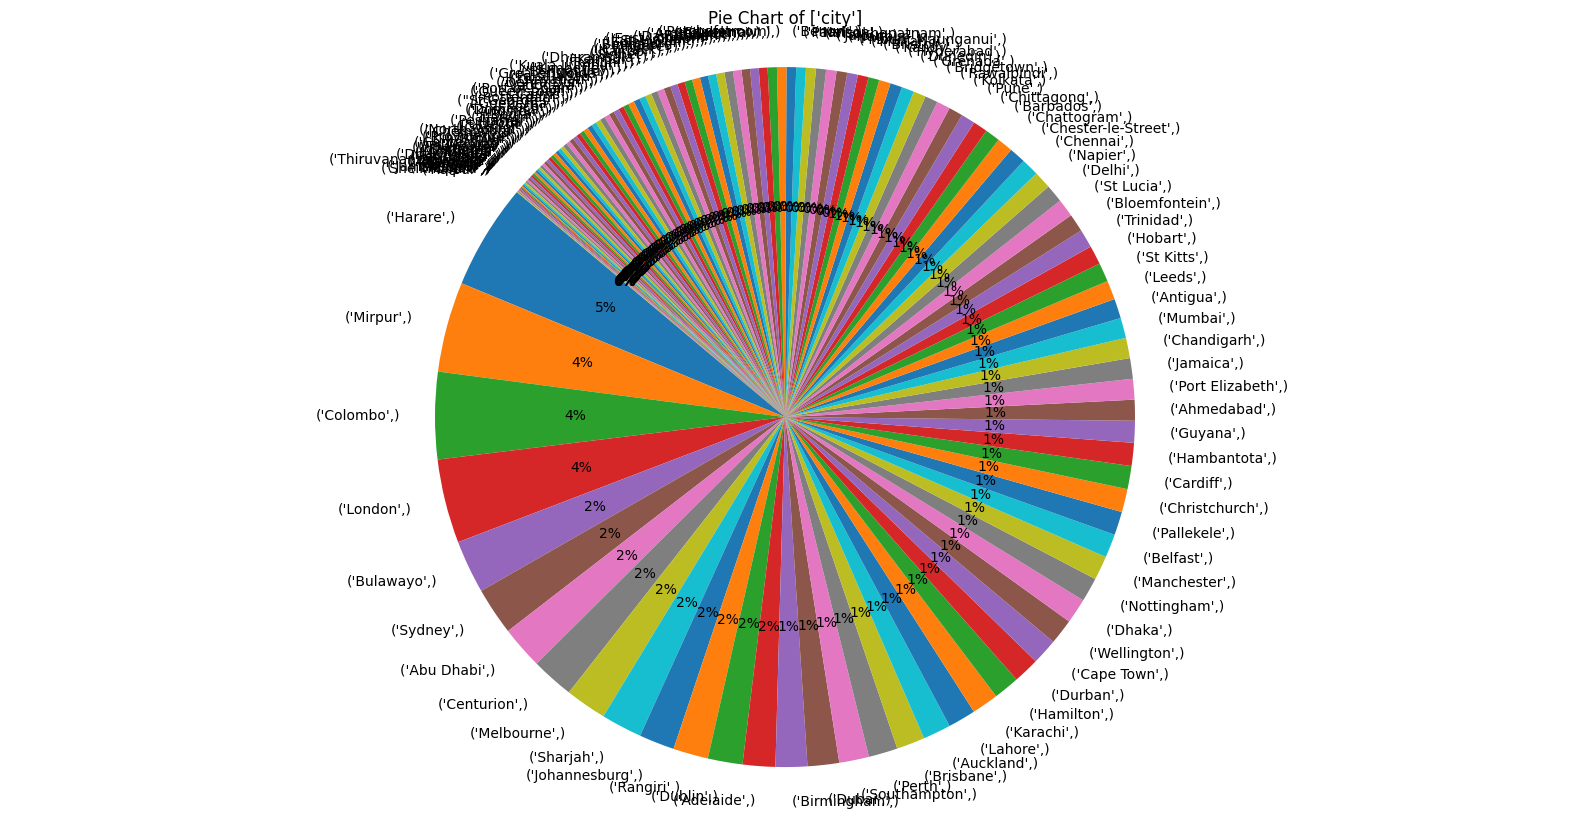

In [33]:
# Plotting pie chart for 'city'
categorical_column = ["city"]


category_counts = final_dataframe[categorical_column].value_counts()


plt.figure(figsize=(20, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal') 


plt.show()

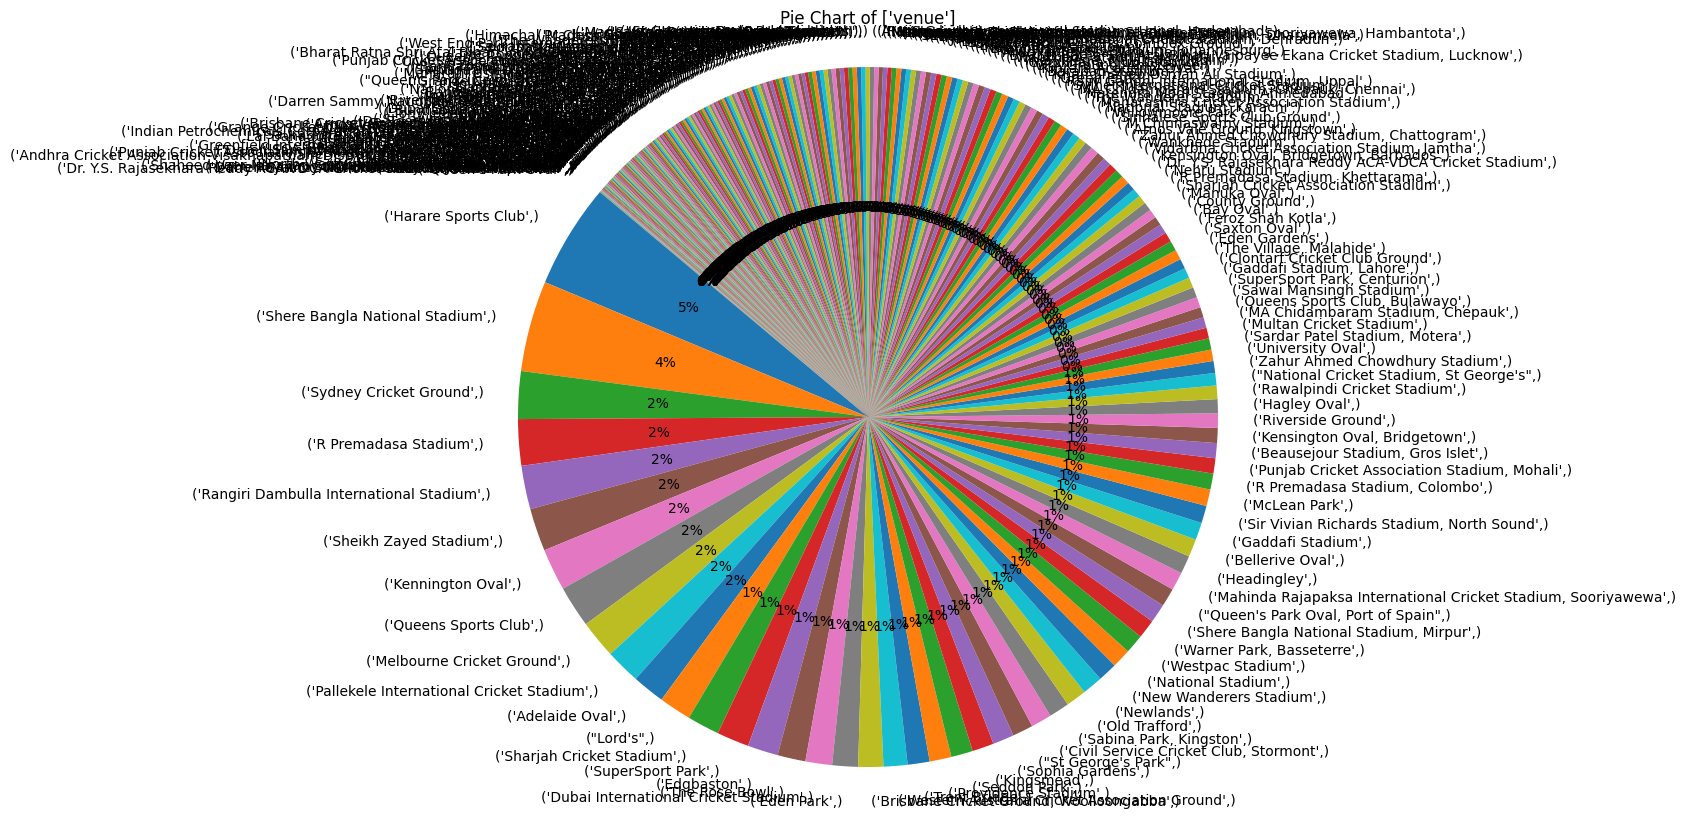

In [34]:
# Plotting pie chart for 'venue'
categorical_column = ["venue"]


category_counts = final_dataframe[categorical_column].value_counts()


plt.figure(figsize=(20, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal') 


plt.show()

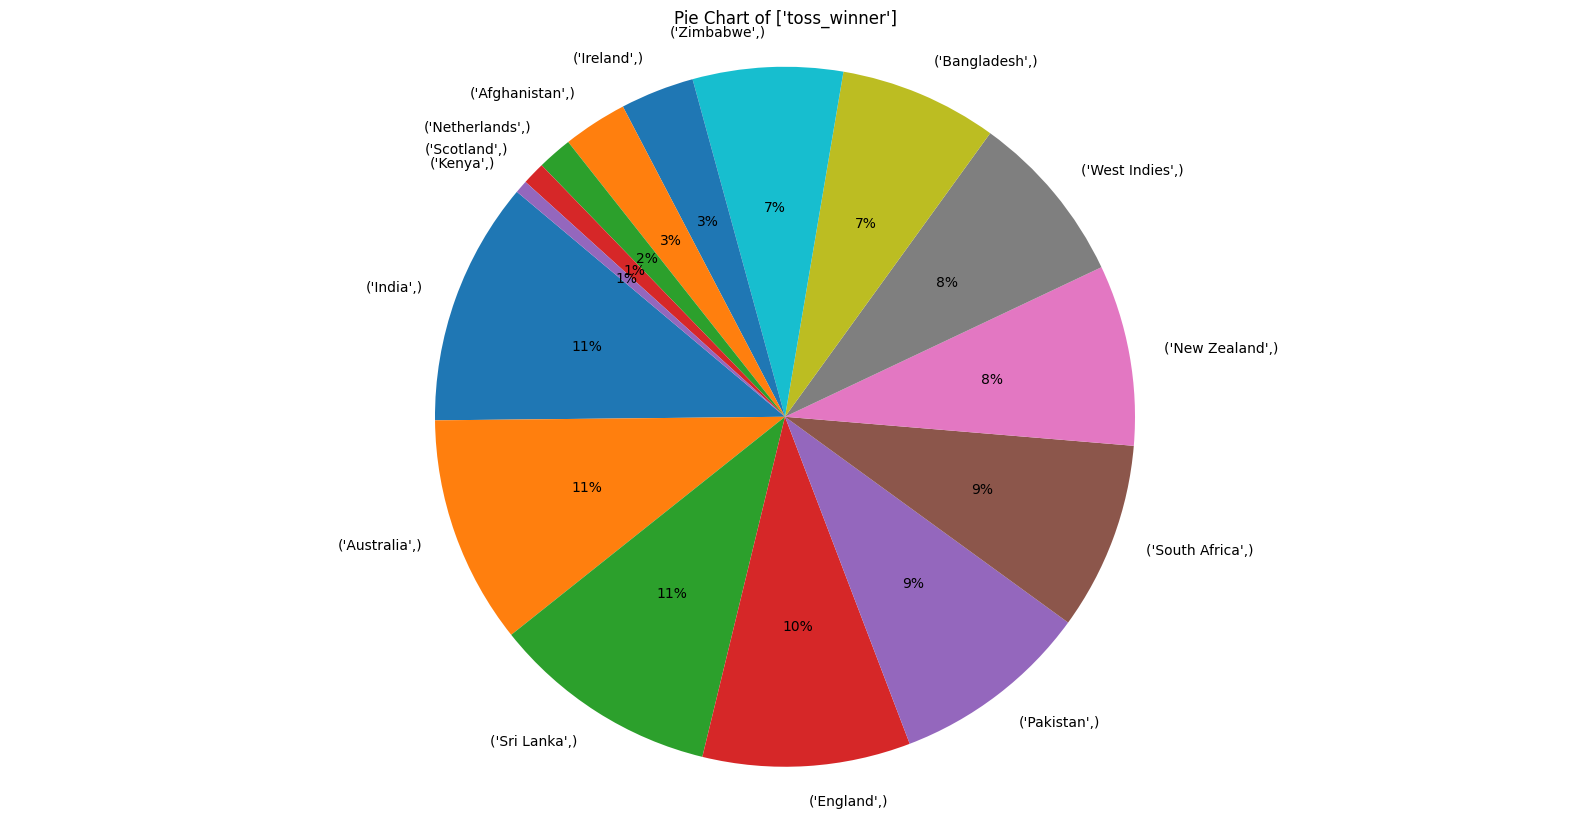

In [35]:
# Plotting pie chart for 'toss_winner'
categorical_column = ["toss_winner"]


category_counts = final_dataframe[categorical_column].value_counts()


plt.figure(figsize=(20, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal') 


plt.show()

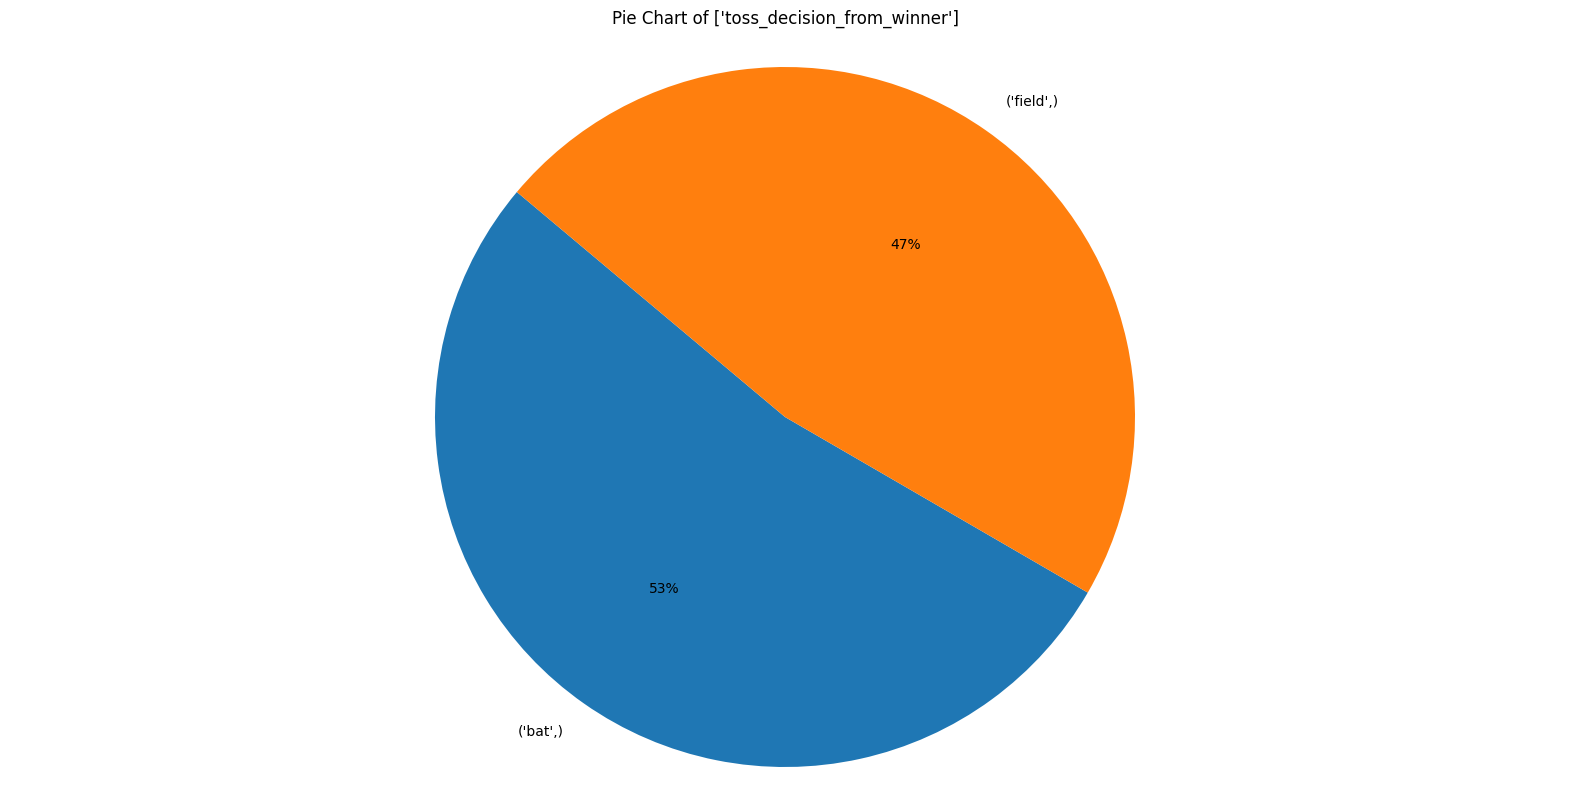

In [36]:
# Plotting pie chart for 'toss_decision_from_winner'
categorical_column = ["toss_decision_from_winner"]


category_counts = final_dataframe[categorical_column].value_counts()


plt.figure(figsize=(20, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column}')
plt.axis('equal') 


plt.show()

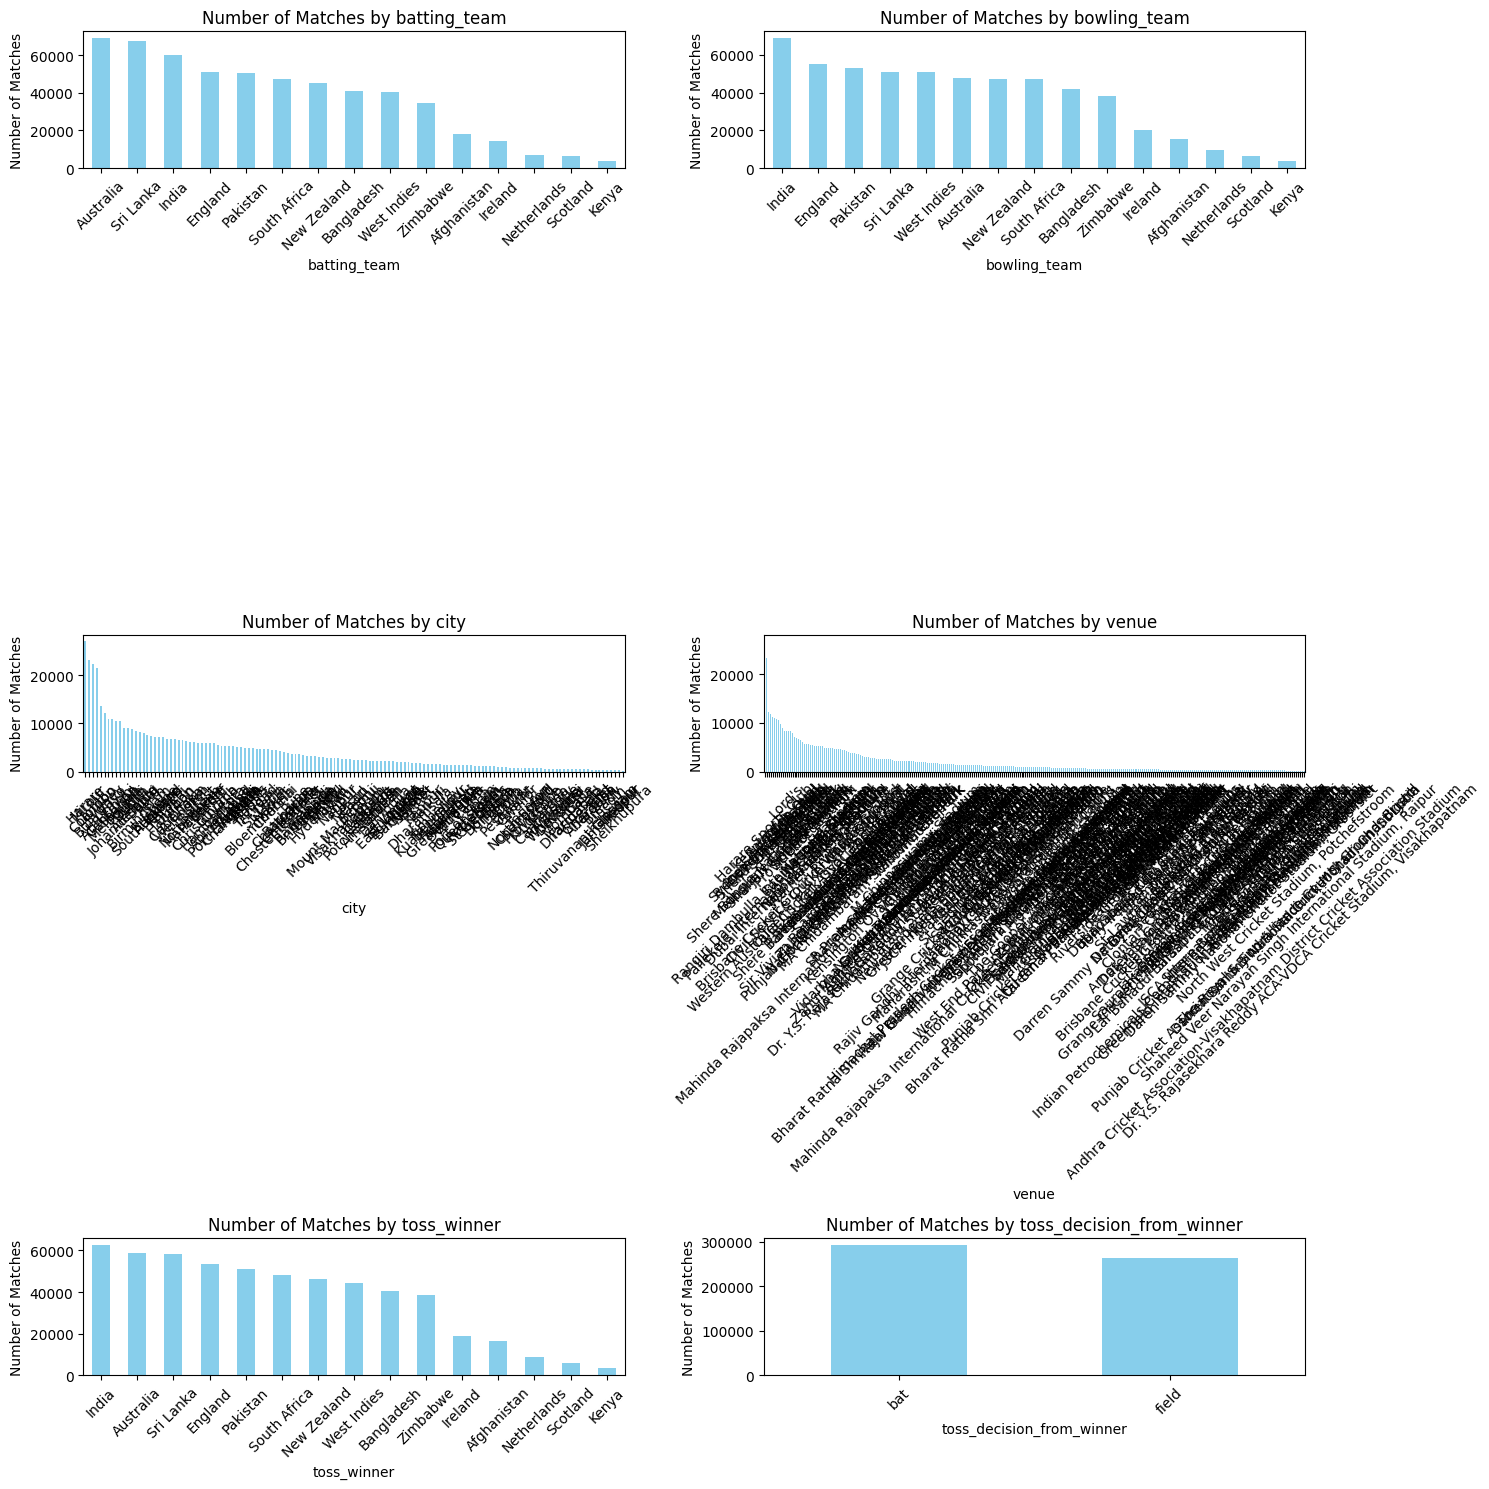

In [37]:
# Plotting bar chart for categorical_columns

import math

categorical_columns = ["batting_team", "bowling_team", "city", "venue", 'toss_winner', 'toss_decision_from_winner']

# Calculate the number of rows and columns needed based on the number of categorical columns
num_categories = len(categorical_columns)
num_rows = math.ceil(num_categories / 2)
num_cols = min(2, num_categories)  # Use 2 columns at most

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(categorical_columns):
    ax = axes[i // num_cols, i % num_cols]
    category_counts = final_dataframe[column].value_counts()
    category_counts.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Number of Matches by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Matches')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [38]:
# Randomly shuffle the rows of the DataFrame
final_dataframe = final_dataframe.sample(final_dataframe.shape[0])

In [39]:
# Extracting features (X) and target variable (y)
X = final_dataframe.drop(columns=['runs_x'])
y = final_dataframe['runs_x']

In [40]:
# Splitting the data into training (60%), test (20%), and validation (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [41]:
X_train

,batting_team,bowling_team,toss_winner,toss_decision_from_winner,current_score,current_run_rate,balls_left,wickets_left,last_five,city,venue
366095,Zimbabwe,West Indies,Zimbabwe,bat,53,5.047619,237,10,30.0,Guyana,Providence Stadium
247037,Australia,England,Australia,bat,108,5.311475,178,10,22.0,Melbourne,Melbourne Cricket Ground
550937,Kenya,Scotland,Kenya,bat,139,4.964286,132,10,23.0,Christchurch,Hagley Oval
590093,Zimbabwe,Pakistan,Pakistan,field,28,3.360000,250,10,20.0,Lahore,Gaddafi Stadium
598764,Sri Lanka,England,England,field,134,4.647399,127,10,38.0,Bristol,County Ground
...,...,...,...,...,...,...,...,...,...,...,...
574787,Australia,South Africa,South Africa,field,121,5.185714,160,10,20.0,Perth,Western Australia Cricket Association Ground
440696,Australia,West Indies,Australia,bat,41,5.857143,258,10,29.0,Canberra,Manuka Oval
274887,South Africa,Ireland,Ireland,field,119,5.173913,162,10,23.0,Belfast,"Civil Service Cricket Club, Stormont"
493566,India,Zimbabwe,Zimbabwe,field,160,4.800000,100,10,18.0,Harare,Harare Sports Club


In [42]:
X_test

,batting_team,bowling_team,toss_winner,toss_decision_from_winner,current_score,current_run_rate,balls_left,wickets_left,last_five,city,venue
161885,New Zealand,Pakistan,Pakistan,field,85,5.049505,199,10,22.0,Rawalpindi,Rawalpindi Cricket Stadium
37304,New Zealand,England,England,field,94,3.481481,138,10,15.0,Christchurch,Hagley Oval
471211,Pakistan,New Zealand,Pakistan,bat,144,4.773481,119,10,19.0,Lahore,"Gaddafi Stadium, Lahore"
312096,South Africa,Kenya,South Africa,bat,60,6.315789,243,10,35.0,Bloemfontein,OUTsurance Oval
536275,Pakistan,Sri Lanka,Sri Lanka,field,39,2.600000,210,10,11.0,Dambulla,Rangiri Dambulla International Stadium
...,...,...,...,...,...,...,...,...,...,...,...
148777,West Indies,Bangladesh,Bangladesh,field,27,2.612903,238,10,11.0,Providence,"Providence Stadium, Guyana"
522301,Pakistan,Sri Lanka,Pakistan,bat,102,2.985366,95,10,16.0,Colombo,R.Premadasa Stadium
70604,Sri Lanka,England,Sri Lanka,bat,195,4.365672,32,10,24.0,Leeds,Headingley
576200,India,Australia,India,bat,43,4.526316,243,10,16.0,Melbourne,Melbourne Cricket Ground


In [43]:
X_validation

,batting_team,bowling_team,toss_winner,toss_decision_from_winner,current_score,current_run_rate,balls_left,wickets_left,last_five,city,venue
485552,England,South Africa,South Africa,field,26,2.689655,242,10,12.0,Centurion,SuperSport Park
343778,Australia,England,Australia,bat,209,4.898438,44,10,31.0,Southampton,The Rose Bowl
590307,Zimbabwe,Pakistan,Pakistan,field,209,4.786260,38,10,34.0,Lahore,Gaddafi Stadium
462863,India,New Zealand,New Zealand,field,52,3.627907,214,10,14.0,Queenstown,"Davies Park, Queenstown"
180722,Australia,India,Australia,bat,157,3.908714,59,10,18.0,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai"
...,...,...,...,...,...,...,...,...,...,...,...
323869,Australia,Pakistan,Australia,bat,45,4.655172,242,10,31.0,Dubai,Dubai Sports City Cricket Stadium
451976,Sri Lanka,Bangladesh,Sri Lanka,bat,66,6.092308,235,10,24.0,Pallekele,Pallekele International Cricket Stadium
606011,Zimbabwe,Ireland,Ireland,field,9,1.741935,269,10,8.0,Harare,Harare Sports Club
426607,New Zealand,West Indies,West Indies,field,142,4.156098,95,10,9.0,St Kitts,"Warner Park, Basseterre"


In [44]:
# Taking categorical and Numercial data :
categorical_columns = ['batting_team', 'bowling_team', 'toss_winner', 'toss_decision_from_winner', 'city', 'venue']

numerical_columns = [col for col in X.columns if col not in categorical_columns]

In [45]:
# Creating a ColumnTransformer with separate transformations for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_columns),
        ('categorical', OneHotEncoder(sparse=False, drop='first'), categorical_columns)
    ])

In [46]:
#XGBRegressor
XGBRegressor_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=1))
])

XGBRegressor_pipeline.fit(X_train, y_train)

y_pred = XGBRegressor_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")

c:\Users\Bitto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared: 0.99
Mean Absolute Error: 3.39
RMSE: 7.73
MSE: 59.73


In [47]:
# Lasso regression model
# lasso = Lasso(alpha=1.0)


# lasso_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', lasso)
# ])


# lasso_pipeline.fit(X_train, y_train)


# y_pred = lasso_pipeline.predict(X_test)


# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)


# print(f"R-squared: {r2:.2f}")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MSE: {mse:.2f}")

In [48]:
# Ridge regression model
# ridge = Ridge(alpha=1.0) 


# ridge_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', ridge)
# ])


# ridge_pipeline.fit(X_train, y_train)


# y_pred = ridge_pipeline.predict(X_test)


# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)


# print(f"R-squared: {r2:.2f}")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MSE: {mse:.2f}")

In [49]:
# Linear Regression model
# linear_reg = LinearRegression()


# linear_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', linear_reg)
# ])


# linear_pipeline.fit(X_train, y_train)


# y_pred = linear_pipeline.predict(X_test)


# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)


# print(f"R-squared: {r2:.2f}")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MSE: {mse:.2f}")

In [50]:
pickle.dump(XGBRegressor_pipeline,open('XGB_pipeline.pkl','wb'))